# Response Themes for "What aspects of Jupyter Notebook make it difficult to use in your workflow?"

* Goal: Extract theme keywords from `difficult_aspects` responses.
* Data: Output from 2_clean_survey.ipynb notebook (`survey_short_columns.csv`)
* Process from [1_ux_survey_review.ipynb](1_ux_survey_review.ipynb):

> Moving forward, here's a semi-automatic procedure we can follow for identifying themes across questions:
> 1. Take a random sample of question responses
> 2. Write down common theme keywords
> 3. Search back through the responses using the theme keywords
> 4. Expand the set of keywords with other words seen in the search results
> 5. Repeat for all themes and questions
> Later, we can use a fully automated topic modeling approach to validate our manually generated themes.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np

Make sure the samples come up the same for anyone that re-runs this.

In [4]:
rs = np.random.RandomState(123)

In [5]:
pd.set_option('max_colwidth', 1000)

In [6]:
df = pd.read_csv('survey_short_columns.csv')

In [7]:
def show(series):
    '''Make random samples easier to read.'''
    for i, value in enumerate(series):
        print('{}) {}'.format(i, value), end='\n\n')

In [8]:
responses = pd.concat([df.difficult_aspects_1, df.difficult_aspects_2, df.difficult_aspects_3], ignore_index=True)

In [9]:
assert len(responses) == len(df) * 3

In [10]:
responses.isnull().value_counts()

True     4216
False     902
dtype: int64

In [11]:
responses = responses.dropna()

## Initial Samples

I ran the sampling code below multiple times and manually built up the initial set of keywords seen commonly across them. I formed groups of conceptually related keywords. Then I tried to assign a simple label to each group.

In [12]:
show(responses.sample(20, random_state=rs))

0) runnning notebooks in batch

1) Relatively hard installation, not simply an app

2) would be nice to be able to import one notebook into another

3) Lack of document structure manipulation

4) Terminal mode doesn't handle keyboard shortcuts well

5) Connecting to diverse data sources

6) Code reuse

7) no concrete status info on running calculations (What does my Python process do that has been running for ages now?)

8) Python 3 vs 2 problems

9) Out-of-order execution

10) Package updates

11) Very limited editing facilities (search-and-replace???)

12) Vanilla jupyter notebook is unwieldy with long notebooks (but mitigated by TOC extension, section folding,...)

13) Control over matplotlib graphs still a bit limited and clumsy

14) No emacs-style bindings for editing code

15) Deploying to the cloud requires a brain + setup time. Should be brainless and next to instantaneous

16) Losing state -- restarting the kernel

17) the kernel needs to be restarted to reload modules (though

In [642]:
themes = {
    'ux': ['manipulating cells', 'mouse', 'copy-paste', 'copy and paste', 'copy&paste', 'c&p', 'double-click',
           'double click', 'and paste', 'multi cell', 'modal', 'muddle', 'double-clicking', 'messy', 'cell ordering', 
           'wasted space', 'scrollbar', 'scroll bar', 'scrolling', 'scroll', 'jump', 'jumping', 'status', 'drag-and', 
           'cell execution numbers', 'theme', 'font', 'numbering', 'numbered cells', 'icons', 'tab function', 
           'multiple cells', 'undo', 'indo', 'cells up and down',  'clunky',  'cells out of place', 'too small',
           'ui feels like 1993', 'more clicks', 'move cells', 'lack of accessibility', 'rearranging', 'click on',
           'screen space', 'too much whitespace', 'collapse code', 'open notebooks', 'launching the notebook', 
           'contrast', 'right-click', 'hard to navigate', 'css', 'width', 'margins', 'small screens', 'bloated ui',
           'print', 'printing', 'tablet', 'mobile', 'hide', 'clutter', ],
    'performance': ['performance', 'slow', 'slower', ],
    'stability': ['freeze', 'hang up', 'reboot', 'rebooting', 'restarting kernel', 'crashes', 'testing', 'hanging', 
                  'hangs', 'brittle', 'work is lost', 'dying', 'dies', 'lose state', 'losing state', 'preserve state',
                  'kernel restarts', 
                  'kernel died/restarting', 'locks up', ],
    'versions': ['versions', 'versioning', 'versionning', '3 vs 2', 'v3', 'package updates', 'changing api', 
                 'dependencies', 'conda',
                 'software version', 'package management', 'version upgrades', 'incompatibilities', ],
    'version_control': ['version control', 'git', 'version management', 'version tracking', 'version history',
                        'control version', 'not versioned', 'source control', 'version-controlled', 
                        'version notebooks', ],
    'hosting': ['deploying', 'cloud', 'installation', 'production', 'spun up', 'client-server', 'startup', 
                'setting up', 'server', 'hosting', 'install', 'deploy', 'virtualenv', 'virtual environment', 
                'resource intensive', 'start-up', 'getting it setup', 'memory use', 'memory usage', 
                'environment set up', 'hosted service', 'configuration', 'configuring', 'remote access', 'native', ],
    'documentation': ['documentation', 'not enough docs', ],
    'editor': ['editor', 'code editing', 'editing code', 'linting', 'fold code', 
               'autocompletion', 'rename all', 'editing', 'emacs', 'vim', 'code completion', 'code review', 'no vi',
               'hard to edit', 'multiple cursor', 'multiple curser', 'completion of parenthesis', 'tab completion', 
               'keyboard', 'autocomplete', 'shortcuts', 'shortcut',
               'hotkeys', 'keybindings', 'key combinations',  ],
    'programming': ['too much programming', 'namespace', 'everything is global', 'programming practices',
                    'remain in memory', 'modules', 'code re-use', 'code reuse', 'port analysis', 'variables', 
                    'portability', 'bad programming', 'api',
                    'hard to port', 'multiprocessing', 'parallel code', 'parallel programming', ],
    'language': ['python', 'language', 'language support', ],
    'content_management': ['content management', 'notebook management', 'long notebooks', 'file system', 'filesystem', 
                           'search-and-replace', 'search', 'file management', 'find and', 'managing notebooks',
                           'notebook directory', 'file explorer', 'large files', 'large notebooks', 
                           'navigation tools', 'where all my notebooks are', 'multiple files', 'structure notebooks', 
                           'file browser', 'create folders', 'managing multiple text files', 'split a notebook', 
                           'directory management', 'large projects', 'default directory', 'work directory', 
                           'finding things', 'directories', ],
    'not_an_ide': ['breakpoints', 'profiling', 'full ide', 'look at all variables', 'ides plugins', 
                   'development environment', 'tips', 'environment window', 'debugger', 'debugging', 'debug tools', 
                   'loaded variables', 'ide features', 'built in ide', 'ide support', 'not and ide', 'ide is limited',
                   'debug errors', 'spell check', 'workspace', 'inferior as an ide', 'code structure',
                   'debug', ],
    'collab': ['collaboration', 'sharing', 'share', 'distribution', 'exporting', 'share',
               'pdf export',  'export to pdf', 'nbconvert', 'collaborate', 'multiple authors', 'document conversion',
               ],
    'dashboards': ['interactivity in charts', 'interactive widgets', 'interactive plots', 'dashboard mode', 
                   'non-interactive graphs', 'presentation mode', '"view only" mode', 'interactivity in charts',
                   'report generation', 'presentations', 'interactive graphic', ],
    'multi_user': ['multi-user', 'multiuser', 'single user', 'single computer', 'permissions', 'permission', 
                   'jupyterhub', 'personalization',],
    'web_based': ['web based', 'browser',], 
    'file_format': ['json files', 'ipynb file', '.py files', 'filesize', 'notebook format', '.ipynb', 'large documents',
                   ], 
}

## Coverage Improvement

I next ran the code below to associate the theme labels with the responses. I then iterated on running the code below to find reponses without labels. I expanded the list of keywords and themes above in order to improve coverage.

In [643]:
import re

In [644]:
def keywords_or(text, keywords):
    for keyword in keywords:
        if re.search('(^|\W+){}'.format(keyword), text, re.IGNORECASE):
            return True
    return False

In [645]:
def tag_themes(data, themes):
    tagged = data.to_frame()
    tagged['themes'] = ''
    for theme, keywords in themes.items():
        results = data.map(lambda text: keywords_or(text, keywords))
        tagged.loc[results, 'themes'] += theme + ','
        print(theme, results.sum())
    return tagged

In [646]:
tagged = tag_themes(responses, themes)
tagged.themes.str.count(',').value_counts()

hosting 79
language 36
documentation 15
not_an_ide 48
dashboards 13
ux 132
version_control 70
collab 40
editor 109
web_based 33
programming 39
performance 15
content_management 48
versions 30
multi_user 10
stability 29
file_format 14


1    573
0    239
2     83
3      7
Name: themes, dtype: int64

In [647]:
tagged[tagged.themes.str.len() == 0].sample(50, random_state=rs)

,0,themes
264,not as interactive as ipython console,
377,Need to start from command line in correct directory,
1400,Notebooks stored on local disk,
4927,Lack of bibliography support (out of the box),
534,Running from command line,
160,Merging and diffing,
2522,Difficult to manage large number of notebooks (>20-30 say),
366,Difficult customisation,
394,Single page,
2257,Moving blocks of cells,


## Precision Check

I then studied a sample of responses for each theme to see if there major inaccuracies in their application (e.g., string matches that are too fuzzy).

In [648]:
tagged = tag_themes(responses, themes)
tagged.themes.str.count(',').value_counts()

hosting 79
language 36
documentation 15
not_an_ide 48
dashboards 13
ux 132
version_control 70
collab 40
editor 109
web_based 33
programming 39
performance 15
content_management 48
versions 30
multi_user 10
stability 29
file_format 14


1    573
0    239
2     83
3      7
Name: themes, dtype: int64

In [649]:
from IPython.display import display, clear_output

In [650]:
for key in themes:
    clear_output()
    display(tagged[tagged.themes.str.contains(key)].sample(10))
    if input('Showing `{}`. Type Enter to continue, "q" to stop.'.format(key)) == 'q':
        break

,0,themes
3717,lack of integration with the python packaging system,"language,"
1952,Inclusion of Python version number in file (for versioning),"language,versions,"
11,The resulting program must be copy/pasted or exported into plain python and then validated again,"language,"
1092,Installation in python 2.6/el6,"hosting,language,"
4006,no concrete status info on running calculations (What does my Python process do that has been running for ages now?),"language,ux,"
712,Managing environments (normally Python virtualenvs) + Jupyter installations manually,"hosting,language,"
4318,Lack of intra-notebook connectivity across languages,"language,"
2527,for python virtualenvs are awkward,"hosting,language,"
3020,Lack of interoperability with other python tools,"language,"
575,It's only python,"language,"


Showing `language`. Type Enter to continue, "q" to stop.q


I also looked at responses with multiple themes to fine tune them, and catch duplication of words in multiple themes.

In [651]:
tagged[tagged.themes.str.count(',') == 2].sample(20, random_state=rs)

,0,themes
662,Exporting non-Python code,"language,collab,"
5,no concurrent terminal with all workspace variables,"not_an_ide,programming,"
17,"There's no Gitlab nbviewer integration, making it difficult for colleagues to view the notebooks without having Jupyter installed","hosting,version_control,"
29,Scrolling through the document is often very slow and clumsy,"ux,performance,"
2431,managing notebooks from front page is clunky,"ux,content_management,"
2621,hard to share in an interactive format (static notebooks are great! but often I want an interactive graphic),"dashboards,collab,"
2076,Block editing of cells (e.g. rearranging a lecture order) is missing,"ux,editor,"
3954,"Poor editing. task: move this section to the top. You have to select a cell, copy it, scroll up, paste it, scroll back down, copy the next cell.....","ux,editor,"
4974,lack of good options for cloud collaboration,"hosting,collab,"
1603,"Version control.. it would be great to separate output from input, and store input as native (e.g., .py) files","hosting,version_control,"


In [652]:
tagged[tagged[0].str.contains('diff')].sample(20, random_state=rs)

,0,themes
21,hard to manage in git (complicated diffs etc.),"version_control,"
3356,difficult to navigate long notebooks/ I quickly start to use the overview over the notebook,"content_management,"
1590,Installing different kernels is impossibly difficult for non-techie people. Trying to explain to students how to install the Sage kernel results in instant confusion. Can't this be made easier?,"hosting,"
2680,"You still need to define libraries of functions in separate modules if you want useful modularity and testability. Disciplined developers do this well enough, but most of the target market for the notebook consists of terrible programmers who get reinforcement learning that one huge undifferentiated namespace of untested garbage is acceptable. Since so many people misuse the tool this way, I think it's fair to say it's the tool's fault for not enforcing some mechanism that makes bad coding practices more painful.","programming,"
160,Merging and diffing,
2091,Difficult to diff notebooks,
344,difficult to combine with version mangement,
711,Integration with git/hg; some users foget to clear outputs which messes up the diffs,"version_control,"
333,hard to do meaningful diffs for git,"version_control,"
298,serving it from terminal from different folders for different projects,


## Keyword Frequencies

In [653]:
import matplotlib
import seaborn

In [654]:
counts = {}

In [655]:
for theme, keywords in themes.items():
    for keyword in keywords:
        hits = responses.map(lambda text: keywords_or(text, [keyword]))
        counts[keyword] = hits.sum()

In [656]:
hist = pd.Series(counts).sort_values()

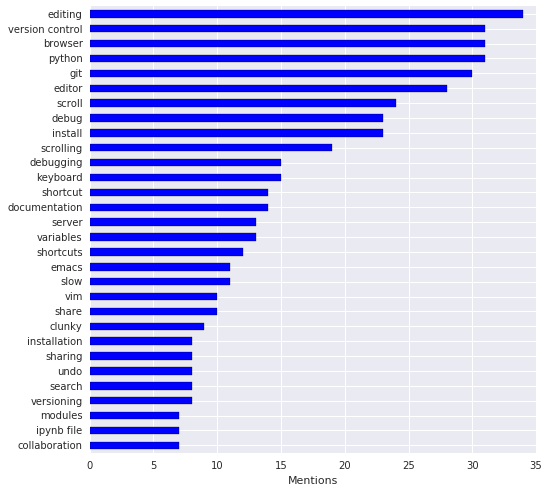

In [657]:
ax = hist[-30:].plot.barh(figsize=(8, 8))
_ = ax.set_xlabel('Mentions')